## Deep Learning Project

## 1. Boston 주택 가격 예측 모델

In [1]:
from tensorflow.keras import models, layers

In [2]:
import matplotlib.pyplot as plt

데이터 로드 및 전처리

In [22]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [4]:
print(len(train_data))
print(len(test_data))

404
102


In [23]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_Data = train_data/std

test_data = test_data - mean
test_data = test_data / std

In [8]:
train_data

array([[ -2.51264057, -11.48019802,  -2.96443069, ...,   2.5240099 ,
         42.11683168,   5.97918317],
       [ -3.72334057,  71.01980198,  -9.07443069, ...,  -3.7759901 ,
         40.59683168,  -9.63081683],
       [  1.15310943, -11.48019802,   6.99556931, ...,   1.7240099 ,
         20.73683168,  -9.48081683],
       ...,
       [ -3.71045057,  23.51980198,  -5.04443069, ...,  -1.5759901 ,
          7.46683168,  -4.91081683],
       [ -1.59593057, -11.48019802,   8.47556931, ...,  -3.7759901 ,
        -92.83316832,   3.04918317],
       [ -3.73072057,  48.51980198,  -8.17443069, ...,  -2.8759901 ,
         21.91683168,  -8.36081683]])

In [10]:
train_data.shape[1]

13

In [24]:

from tensorflow.keras import models, layers, callbacks, optimizers

model = models.Sequential()
model.add(layers.Input(shape=(x_train.shape[1], )))
model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(1))
model.summary()

model.compile(loss='mse',
              optimizer='Adam',
              metrics=['mae'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
activation (Activation)      (None, 64)                0         
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
activation_1 (Activation)    (None, 64)               

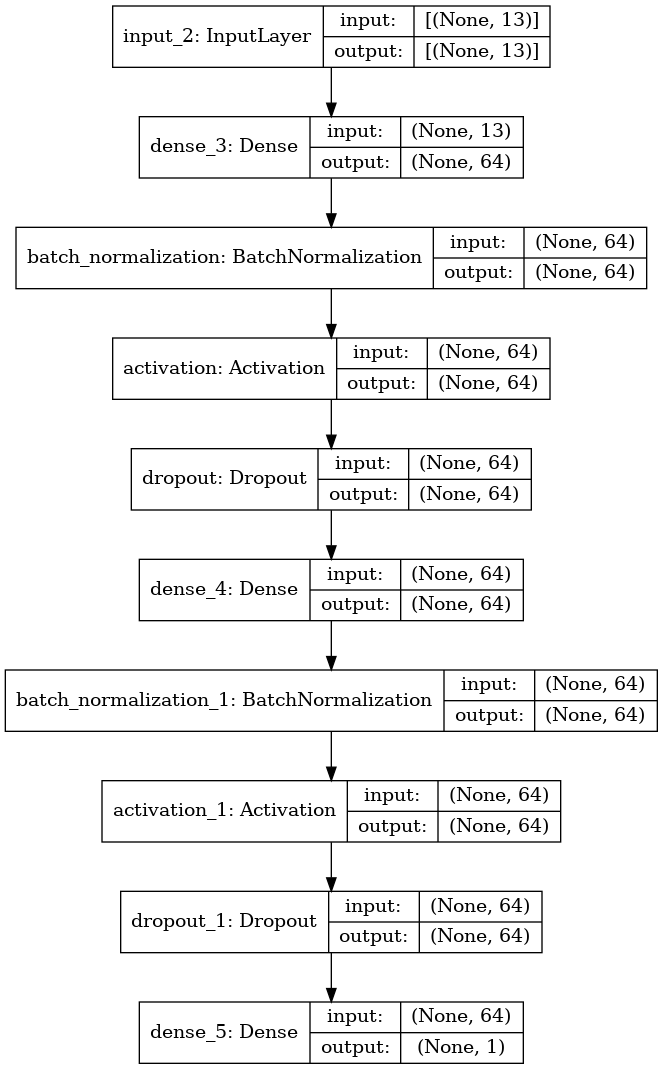

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [26]:
from tensorflow.keras import models, layers, callbacks, optimizers

check_point_cb = callbacks.ModelCheckpoint('boston_housing.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(train_data, train_labels, 
                     epochs=50,
                     batch_size=30,
                     validation_split=0.2,
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
11/11 [==============================] - 1s 30ms/step - loss: 555.0440 - mae: 21.6261 - val_loss: 548.1949 - val_mae: 21.7206
Epoch 2/50
11/11 [==============================] - 0s 5ms/step - loss: 533.5584 - mae: 21.2181 - val_loss: 540.5470 - val_mae: 21.6238
Epoch 3/50
11/11 [==============================] - 0s 5ms/step - loss: 510.7468 - mae: 20.8321 - val_loss: 529.3011 - val_mae: 21.4085
Epoch 4/50
11/11 [==============================] - 0s 5ms/step - loss: 490.7375 - mae: 20.4036 - val_loss: 517.7401 - val_mae: 21.1639
Epoch 5/50
11/11 [==============================] - 0s 5ms/step - loss: 475.1908 - mae: 20.0290 - val_loss: 502.8546 - val_mae: 20.8316
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 455.4479 - mae: 19.6019 - val_loss: 489.4702 - val_mae: 20.5311
Epoch 7/50
11/11 [==============================] - 0s 6ms/step - loss: 440.4820 - mae: 19.2804 - val_loss: 474.6309 - val_mae: 20.1862
Epoch 8/50
11/11 [=============================

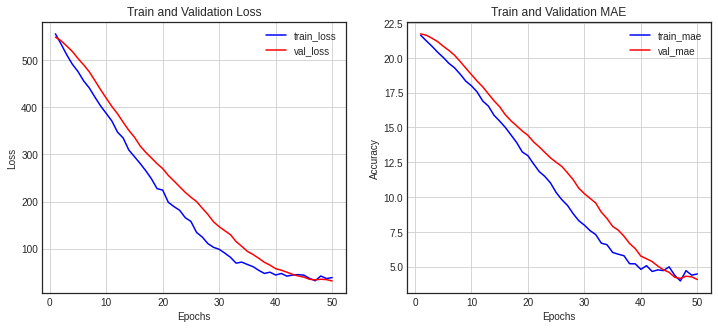

In [28]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [29]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 68.3592 - mae: 5.9409


[68.35917663574219, 5.940878868103027]

## 2. Reuters 딥러닝 모델

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks, utils
from keras.datasets import reuters

데이터 로드 및 전처리

In [55]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.

(x_train_full, y_train_full), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

6287
2695
2246
46


In [56]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.

y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

모델 구성 및 컴파일

In [66]:
from tensorflow.keras import models, layers, callbacks, optimizers

model = models.Sequential()
model.add(layers.Input(shape=(10000, )))
model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(128))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(46, activation='softmax'))

In [67]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               1280128   
_________________________________________________________________
batch_normalization_10 (Batc (None, 128)               512       
_________________________________________________________________
activation_10 (Activation)   (None, 128)               0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_11 (Batc (None, 128)               512       
_________________________________________________________________
activation_11 (Activation)   (None, 128)              

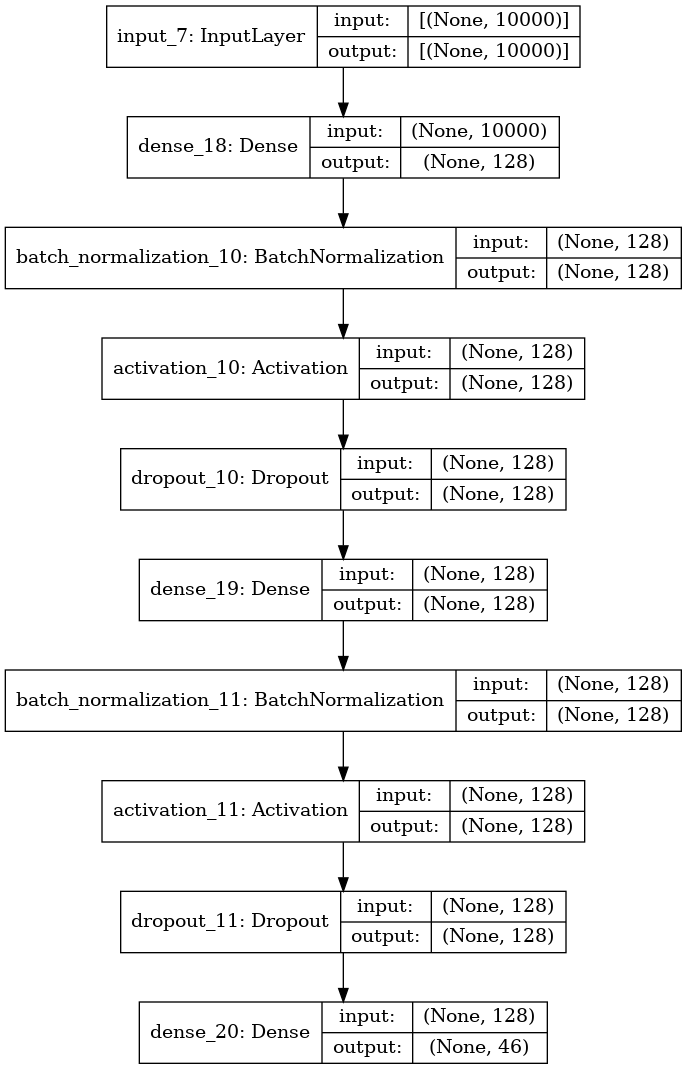

In [68]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [69]:
from tensorflow.keras import models, layers, callbacks, optimizers

model.compile(loss='categorical_crossentropy',
               optimizer=optimizers.SGD(),
               metrics=['accuracy'])

모델 학습

In [70]:
from tensorflow.keras import models, layers, callbacks, optimizers

check_point_cb = callbacks.ModelCheckpoint('reuters.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, 
                     epochs=50,
                     batch_size=512,
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
13/13 [==============================] - 1s 50ms/step - loss: 3.5911 - accuracy: 0.1853 - val_loss: 3.7201 - val_accuracy: 0.4312
Epoch 2/50
13/13 [==============================] - 0s 17ms/step - loss: 2.7831 - accuracy: 0.4213 - val_loss: 3.5842 - val_accuracy: 0.4761
Epoch 3/50
13/13 [==============================] - 0s 16ms/step - loss: 2.3951 - accuracy: 0.4869 - val_loss: 3.4416 - val_accuracy: 0.4779
Epoch 4/50
13/13 [==============================] - 0s 16ms/step - loss: 2.1724 - accuracy: 0.5208 - val_loss: 3.3015 - val_accuracy: 0.4824
Epoch 5/50
13/13 [==============================] - 0s 16ms/step - loss: 2.0113 - accuracy: 0.5437 - val_loss: 3.1703 - val_accuracy: 0.4853
Epoch 6/50
13/13 [==============================] - 0s 15ms/step - loss: 1.8792 - accuracy: 0.5766 - val_loss: 3.0425 - val_accuracy: 0.4928
Epoch 7/50
13/13 [==============================] - 0s 16ms/step - loss: 1.8041 - accuracy: 0.5869 - val_loss: 2.9229 - val_accuracy: 0.5032
Epoch 8/50
13

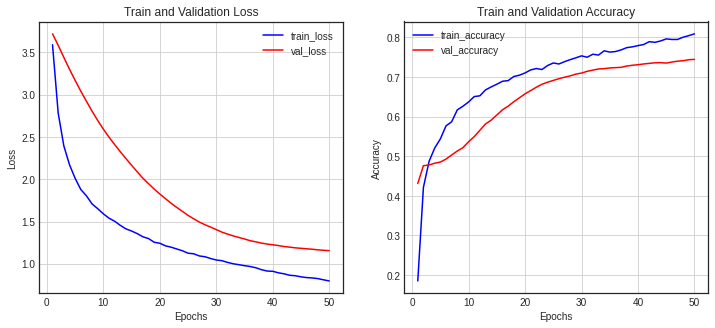

In [71]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [72]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 2ms/step - loss: 1.2006 - accuracy: 0.7324


[1.2005535364151, 0.7324131727218628]

## 3. CIFAR10 딥러닝 모델

데이터 로드 및 전처리

In [73]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [75]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.2,
                                                  random_state=123)

print(f"전체 학습 데이터: {x_train_full.shape} 레이블: {y_train_full.shape}")
print(f"학습 데이터: {x_train.shape} 레이블: {y_train.shape}")
print(f"검증 데이터: {x_val.shape} 레이블: {y_val.shape}")
print(f"테스트 데이터: {x_test.shape} 레이블: {y_test.shape}")

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [78]:
# class_name 변수를 만들어 cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
# 를 담습니다.

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

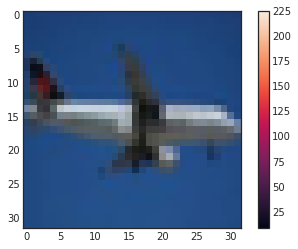

In [79]:
import seaborn as sns

sns.set_style('white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [80]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [83]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.

x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

In [84]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [85]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

모델 구성 및 컴파일

In [86]:
from tensorflow.keras import models, layers
from tensorflow.keras import initializers, activations

model = models.Sequential()
model.add(layers.Input(shape=(3072, )))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dense(2048))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1024))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 3072)              12288     
_________________________________________________________________
activation_12 (Activation)   (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 2048)              6293504   
_________________________________________________________________
batch_normalization_13 (Batc (None, 2048)              8192      
_________________________________________________________________
activation_13 (Activation)   (None, 2048)              0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1024)             

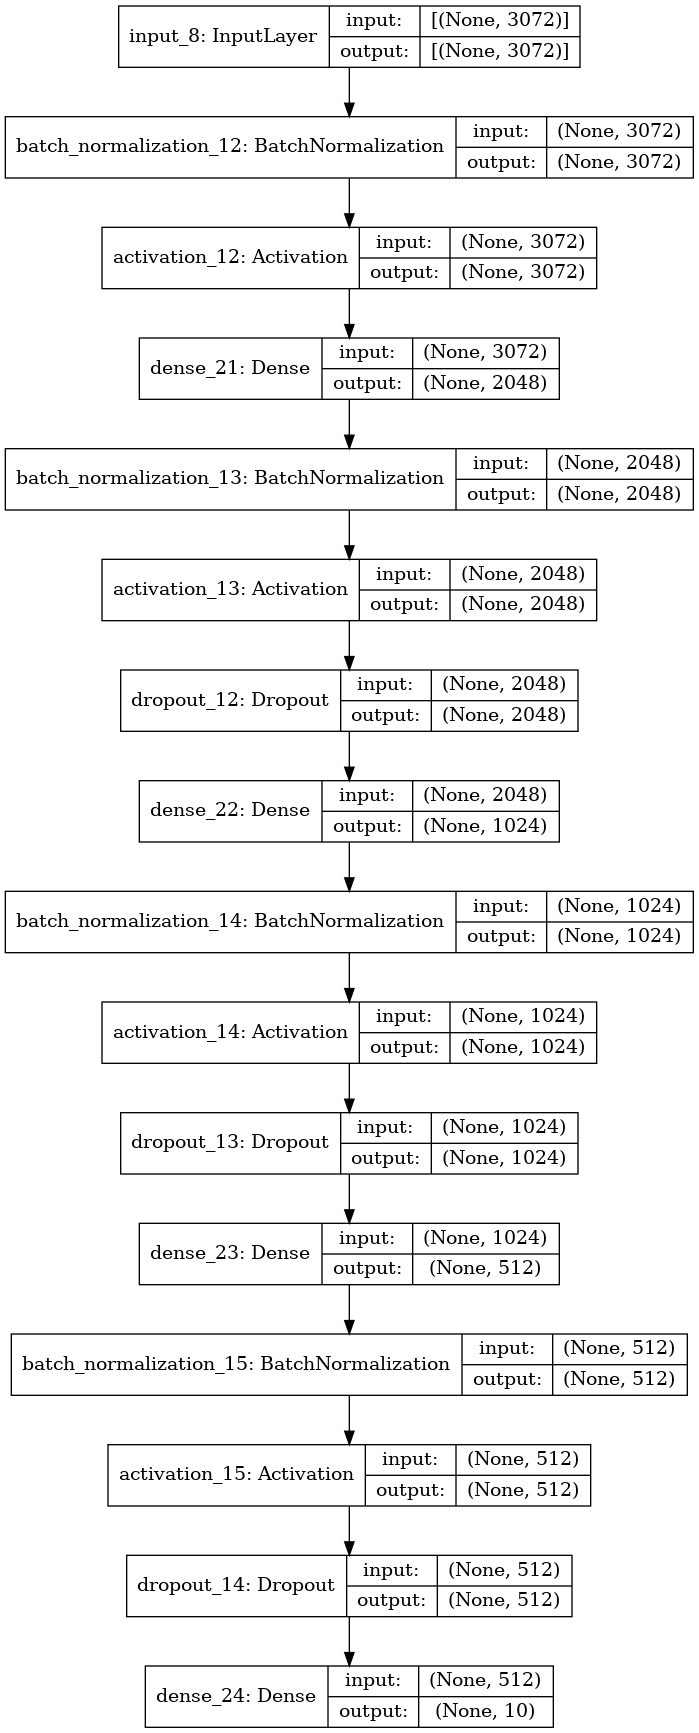

In [87]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file="model.png", show_shapes=True, show_layer_names=True)

In [88]:
from tensorflow.keras import models, layers, callbacks, optimizers

check_point_cb = callbacks.ModelCheckpoint('CIFAR10.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train, 
                     epochs=50,
                     batch_size=512, 
                     validation_data=(x_val, y_val),
                     callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/50
79/79 [==============================] - 2s 20ms/step - loss: 2.1816 - accuracy: 0.2596 - val_loss: 1.8790 - val_accuracy: 0.3234
Epoch 2/50
79/79 [==============================] - 1s 14ms/step - loss: 1.8590 - accuracy: 0.3394 - val_loss: 1.7388 - val_accuracy: 0.3832
Epoch 3/50
79/79 [==============================] - 1s 14ms/step - loss: 1.7422 - accuracy: 0.3797 - val_loss: 1.7049 - val_accuracy: 0.3963
Epoch 4/50
79/79 [==============================] - 1s 14ms/step - loss: 1.6554 - accuracy: 0.4077 - val_loss: 1.6086 - val_accuracy: 0.4274
Epoch 5/50
79/79 [==============================] - 1s 14ms/step - loss: 1.5924 - accuracy: 0.4316 - val_loss: 1.5882 - val_accuracy: 0.4411
Epoch 6/50
79/79 [==============================] - 1s 14ms/step - loss: 1.5423 - accuracy: 0.4483 - val_loss: 1.5562 - val_accuracy: 0.4516
Epoch 7/50
79/79 [==============================] - 1s 14ms/step - loss: 1.4976 - accuracy: 0.4633 - val_loss: 1.5540 - val_accuracy: 0.4531
Epoch 8/50
79

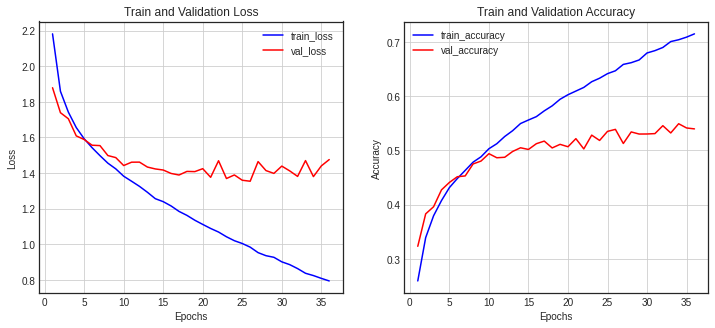

In [89]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델 평가 및 예측

In [90]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3336 - accuracy: 0.5399


[1.3336154222488403, 0.539900004863739]